In [44]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Step 2: Load the dataset
df=pd.read_csv("owid-covid-data.csv")

In [46]:
# Step 3: Data Overview
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [47]:
df.shape

(429435, 67)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [49]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [50]:
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [51]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [52]:
# Step 4: Data cleaning
# Keep necessary columns
cols = ["location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "people_vaccinated", "population"]
df = df[cols]

In [53]:
df["date"]=pd.to_datetime(df["date"], errors="coerce")

In [54]:
# Remove rows with missing location or date
df = df.dropna(subset=['location', 'date'])

In [55]:
# Fill NaNs in numeric columns with 0
df.fillna(0, inplace=True)

In [56]:
df["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [57]:
# Filter out aggregate rows
df=df[~df["location"].isin(["World","Africa","Asia","Europe","North America", "Oceania","South America", "High income", "Low income", "Lower middle income", "Upper middle income", "European Union", "European Union (27)"])]
# Remove rows with population <= 0
df = df[df["population"] > 0]
# Remove rows with total_cases < 0
df = df[df["total_cases"] >= 0]
# Remove rows with total_deaths < 0
df = df[df["total_deaths"] >= 0]
# Remove rows with new_cases < 0
df = df[df["new_cases"] >= 0]
# Remove rows with new_deaths < 0
df = df[df["new_deaths"] >= 0]
# Remove rows with people_vaccinated < 0
df = df[df["people_vaccinated"] >= 0]   

In [58]:
# Step 5: Create summary statistics
latest = df.sort_values('date').groupby('location').tail(1)
latest

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population
422728,Western Sahara,2022-04-20,0.0,0.0,0.0,0.0,0.000000e+00,576005
282897,Northern Cyprus,2022-12-06,0.0,0.0,0.0,0.0,0.000000e+00,382836
225269,Macao,2023-04-13,0.0,0.0,0.0,0.0,6.797030e+05,695180
421053,Wales,2023-07-12,0.0,0.0,0.0,0.0,0.000000e+00,3170000
375651,Taiwan,2023-09-24,0.0,0.0,0.0,0.0,2.189924e+07,23893396
...,...,...,...,...,...,...,...,...
93765,Czechia,2024-08-12,0.0,0.0,0.0,0.0,0.000000e+00,10493990
217093,Lithuania,2024-08-14,0.0,0.0,0.0,0.0,1.958300e+06,2750058
230301,Malaysia,2024-08-14,0.0,0.0,0.0,0.0,2.813857e+07,33938216
408137,Upper-middle-income countries,2024-08-14,0.0,0.0,0.0,0.0,2.109015e+09,2525921300


In [59]:
# Calculate cases per million
latest['cases_per_million'] = latest['total_cases'] / latest['population'] * 1e6
latest['deaths_per_million'] = latest['total_deaths'] / latest['population'] * 1e6
latest['vaccinated_pct'] = latest['people_vaccinated'] / latest['population'] * 100


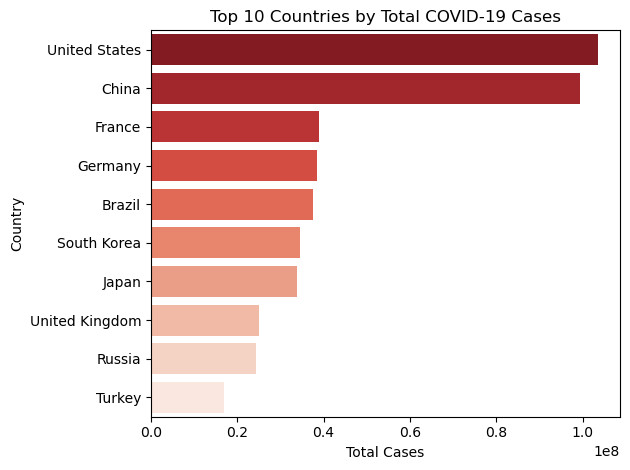

In [60]:
# Step 6: Top 10 countries by total cases
top10_cases = latest.sort_values('total_cases', ascending=False).head(10)
sns.barplot(data=top10_cases, x='total_cases', y='location', palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_total_cases.png")
plt.show()

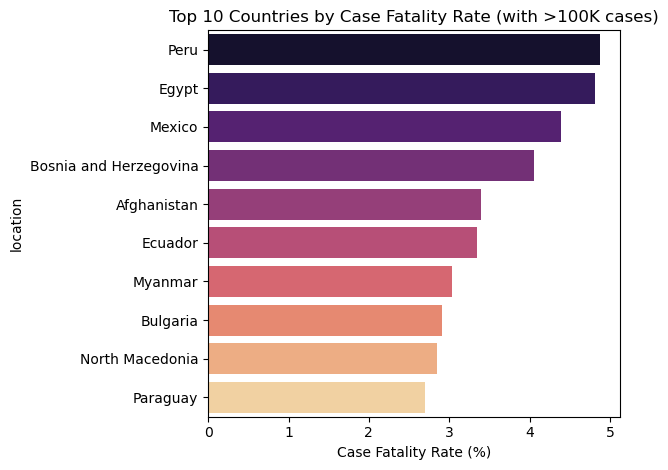

In [61]:
# Add CFR = total_deaths / total_cases
latest["case_fatality_rate"] = latest["total_deaths"] / latest["total_cases"] * 100

# Top 10 CFRs (only for countries with over 100K cases)
cfr_cut = latest[latest["total_cases"] > 100_000]
top_cfr = cfr_cut.sort_values("case_fatality_rate", ascending=False).head(10)

# Plot
sns.barplot(data=top_cfr, x="case_fatality_rate", y="location", palette="magma")
plt.title("Top 10 Countries by Case Fatality Rate (with >100K cases)")
plt.xlabel("Case Fatality Rate (%)")
plt.tight_layout()
plt.show()


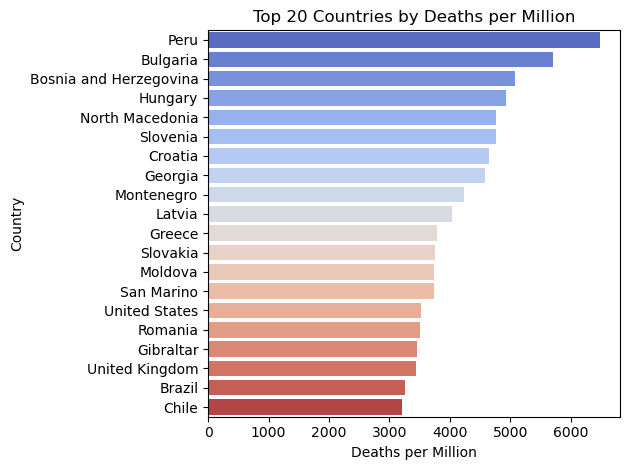

In [62]:
# Step 7: Deaths per Million - Heatmap View
top20_deaths = latest.sort_values("deaths_per_million", ascending=False).head(20)
sns.barplot(data=top20_deaths, x='deaths_per_million', y='location', palette='coolwarm')
plt.title("Top 20 Countries by Deaths per Million")
plt.xlabel("Deaths per Million")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [63]:
# Milestone: 50% vaccinated population
vax_progress = df[df['people_vaccinated'] > 0].copy()
vax_progress['vaccinated_pct'] = vax_progress['people_vaccinated'] / vax_progress['population'] * 100

# Find the first date each country crossed 50%
milestone_50 = vax_progress[vax_progress['vaccinated_pct'] >= 50]
first_50 = milestone_50.sort_values('date').groupby('location').first().reset_index()

# Top 10 countries that reached it earliest
fastest_vaxx = first_50.sort_values("date").head(10)
print("Top 10 countries to reach 50% vaccinated:")
print(fastest_vaxx[['location', 'date', 'vaccinated_pct']])


Top 10 countries to reach 50% vaccinated:
             location       date  vaccinated_pct
52          Gibraltar 2021-02-17       50.139242
124        Seychelles 2021-02-27       52.166892
69             Israel 2021-02-28       50.078305
117      Saint Helena 2021-03-15       57.526384
45   Falkland Islands 2021-03-26       57.537490
15             Bhutan 2021-03-31       50.451974
68        Isle of Man 2021-04-08       50.978305
86           Maldives 2021-04-08       50.636887
155             Wales 2021-04-11       50.089937
123          Scotland 2021-04-16       50.007080


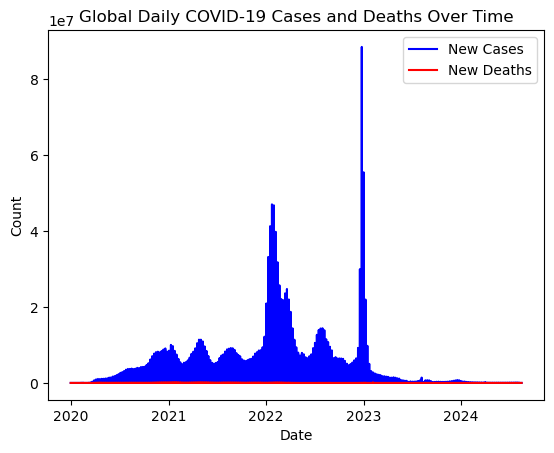

In [64]:
#  Step 8: Trend Over Time (Global Summary)
global_c = df.groupby("date")[["new_cases", "new_deaths"]].sum().reset_index()
sns.lineplot(data=global_c, x="date", y="new_cases", label="New Cases", color='blue')
sns.lineplot(data=global_c, x="date", y="new_deaths", label="New Deaths", color='red')
plt.title("Global Daily COVID-19 Cases and Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()